In [5]:
import NN as nClassifier
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore") #suppress warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
# add header names
headers =  ['age', 'sex','chest_pain','resting_blood_pressure',  
        'serum_cholestoral', 'fasting_blood_sugar', 'resting_ecg_results',
        'max_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',"slope of the peak",
        'num_of_major_vessels','thal', 'heart_disease']

In [7]:
heart_df = pd.read_csv('heart.dat', sep=' ', names=headers)


#convert imput to numpy arrays
X = heart_df.drop(columns=['heart_disease'])

#replace target class with 0 and 1 
#1 means "have heart disease" and 0 means "do not have heart disease"
heart_df['heart_disease'] = heart_df['heart_disease'].replace(1, 0)
heart_df['heart_disease'] = heart_df['heart_disease'].replace(2, 1)

In [8]:
y_label = heart_df['heart_disease'].values.reshape(X.shape[0], 1)

#split data into train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size=0.3, random_state=2)

In [9]:
#standardize the dataset
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)

In [10]:
print(f"Shape of train set is {Xtrain.shape}")
print(f"Shape of test set is {Xtest.shape}")
print(f"Shape of train label is {ytrain.shape}")
print(f"Shape of test labels is {ytest.shape}")

Shape of train set is (189, 13)
Shape of test set is (81, 13)
Shape of train label is (189, 1)
Shape of test labels is (81, 1)


In [11]:
train = nClassifier.NeuralLearn()
train.setter(Xtrain,ytrain,[Xtrain.shape[1],8,1])
train.fit()

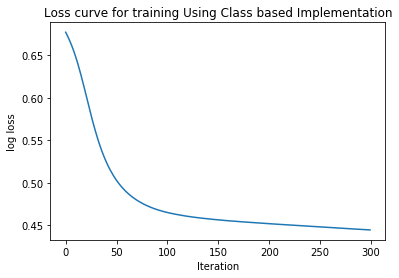

In [12]:
train.plot_loss()

In [14]:
print("Accuracy using class based implementation " + str(train.accuracy(Xtest,ytest)))

Accuracy using class based implementation 74.07407407407408


# Scikit-Learn Implementation

In [15]:
from sklearn.neural_network import MLPClassifier

In [17]:
clf = MLPClassifier(hidden_layer_sizes=(8))
clf.fit(Xtrain,ytrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=8, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [18]:
prediction = clf.predict(Xtest)
pre = [[x] for x in prediction]
pre = np.array(pre)

In [19]:
acc = 100*(np.sum(pre==ytest)/ytest.size)

In [20]:
print("Accuracy of Scikit-Learn Model "+str(acc))

Accuracy of Scikit-Learn Model 77.77777777777779
